In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

### Reading data

In [ ]:
# df1 = pd.read_csv('../data/raw/cpu4.csv')
# df1 = df1.sort_values(by='timestamp', ascending=True)
# df1 = df1.replace({'label': {0.0: False, 1.0: True}})

In [ ]:
# dfcpu = pd.read_csv('../data/processed/cpu4.csv')

dfcpu = pd.read_csv('https://raw.githubusercontent.com/ChetanaRajabhoj/kagglex-project/main/data/processed/cpu4.csv')

In [ ]:
dfcpu.head()

,datetime,timestamp,value,label,date,time,month,day,hour,minute,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour.1,hour_sin,hour_cos
0,2016-07-24 16:00:00,1469376000,0.847300,0,2016-07-24,16:00:00,July,Sunday,16,0,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
1,2016-07-24 16:05:00,1469376300,-0.036137,0,2016-07-24,16:05:00,July,Sunday,16,5,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
2,2016-07-24 16:10:00,1469376600,0.074292,0,2016-07-24,16:10:00,July,Sunday,16,10,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
3,2016-07-24 16:15:00,1469376900,0.074292,0,2016-07-24,16:15:00,July,Sunday,16,15,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
4,2016-07-24 16:20:00,1469377200,-0.036137,0,2016-07-24,16:20:00,July,Sunday,16,20,...,0,0,0,0,0,0,0,16,-0.866025,-0.5


In [ ]:
dfcpu.shape

(17568, 41)

How many anomalies do we have in the dataset?

In [ ]:
print(dfcpu.label.value_counts(), "\n","--------------------------")
print("in percentage", "\n", "--------------------------")
print(dfcpu.label.value_counts(normalize=True))

0    17359
1      209
Name: label, dtype: int64 
 --------------------------
in percentage 
 --------------------------
0    0.988103
1    0.011897
Name: label, dtype: float64


In [ ]:
dfcpu.head()

,datetime,timestamp,value,label,date,time,month,day,hour,minute,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour.1,hour_sin,hour_cos
0,2016-07-24 16:00:00,1469376000,0.847300,0,2016-07-24,16:00:00,July,Sunday,16,0,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
1,2016-07-24 16:05:00,1469376300,-0.036137,0,2016-07-24,16:05:00,July,Sunday,16,5,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
2,2016-07-24 16:10:00,1469376600,0.074292,0,2016-07-24,16:10:00,July,Sunday,16,10,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
3,2016-07-24 16:15:00,1469376900,0.074292,0,2016-07-24,16:15:00,July,Sunday,16,15,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
4,2016-07-24 16:20:00,1469377200,-0.036137,0,2016-07-24,16:20:00,July,Sunday,16,20,...,0,0,0,0,0,0,0,16,-0.866025,-0.5


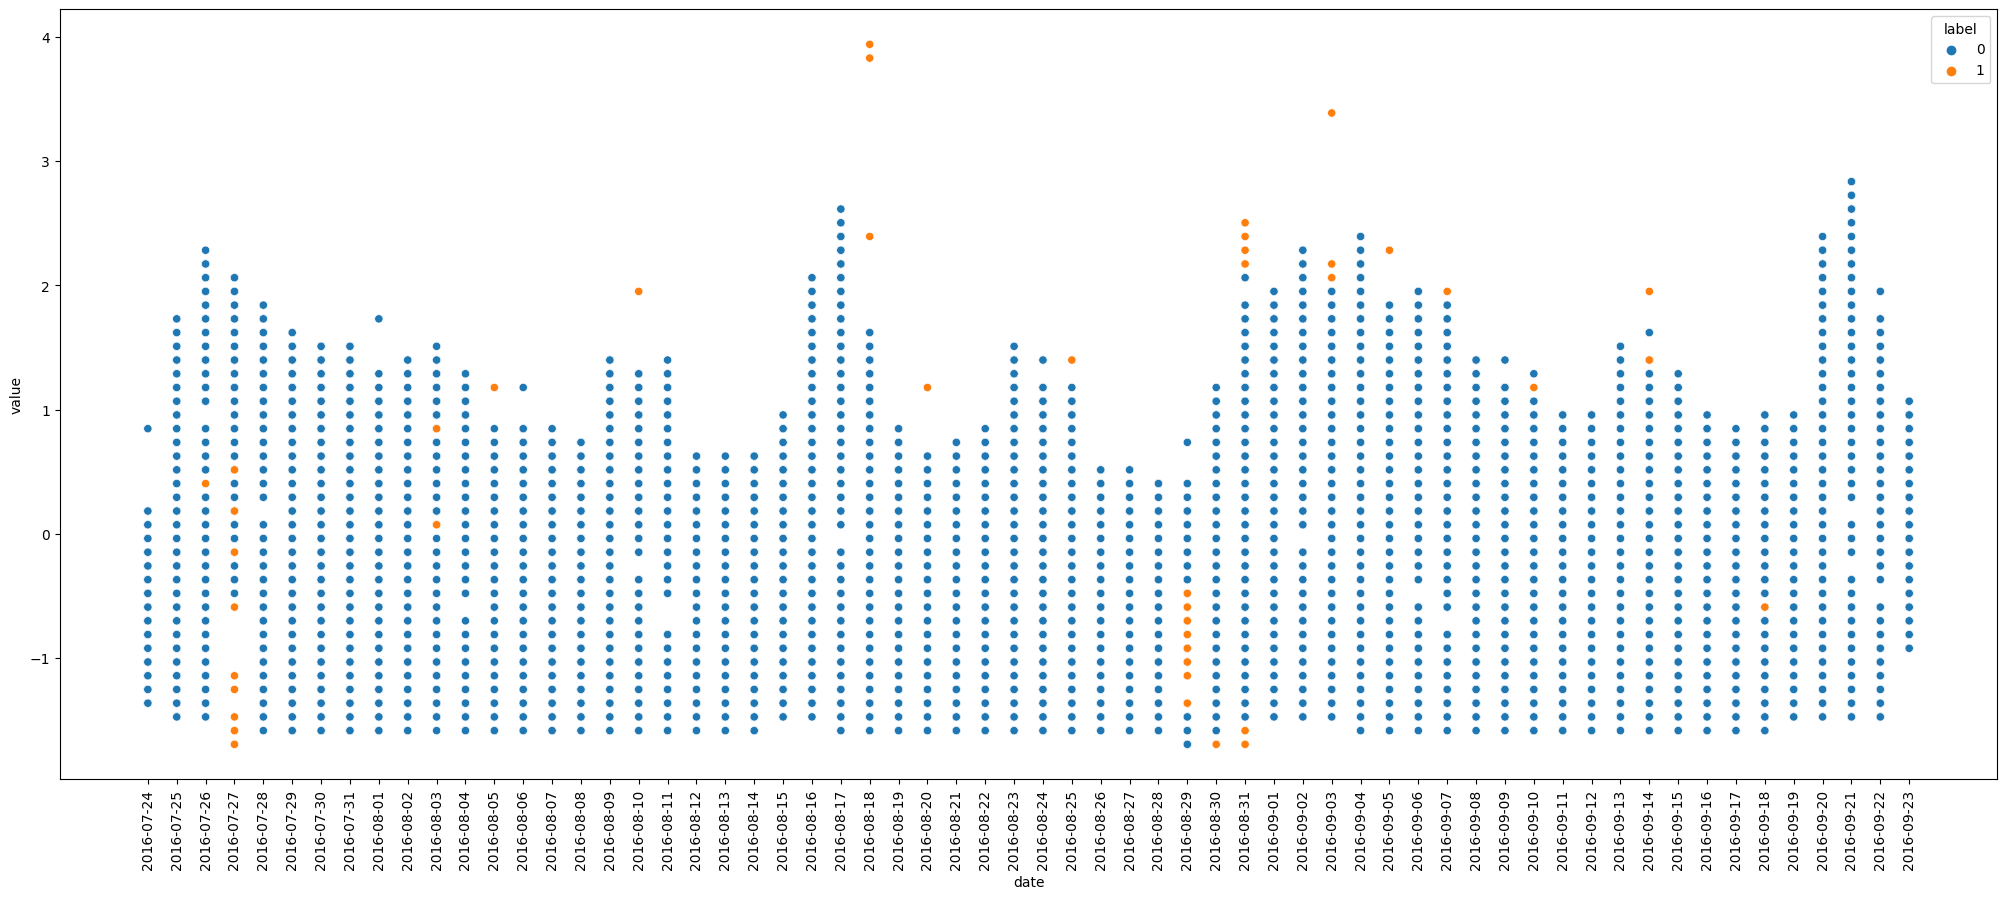

In [ ]:
plt.figure(figsize=(25,10))
ax = sns.scatterplot(data=dfcpu, x="date", y="value", hue="label")
ax.tick_params(axis='x', labelrotation = 90)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

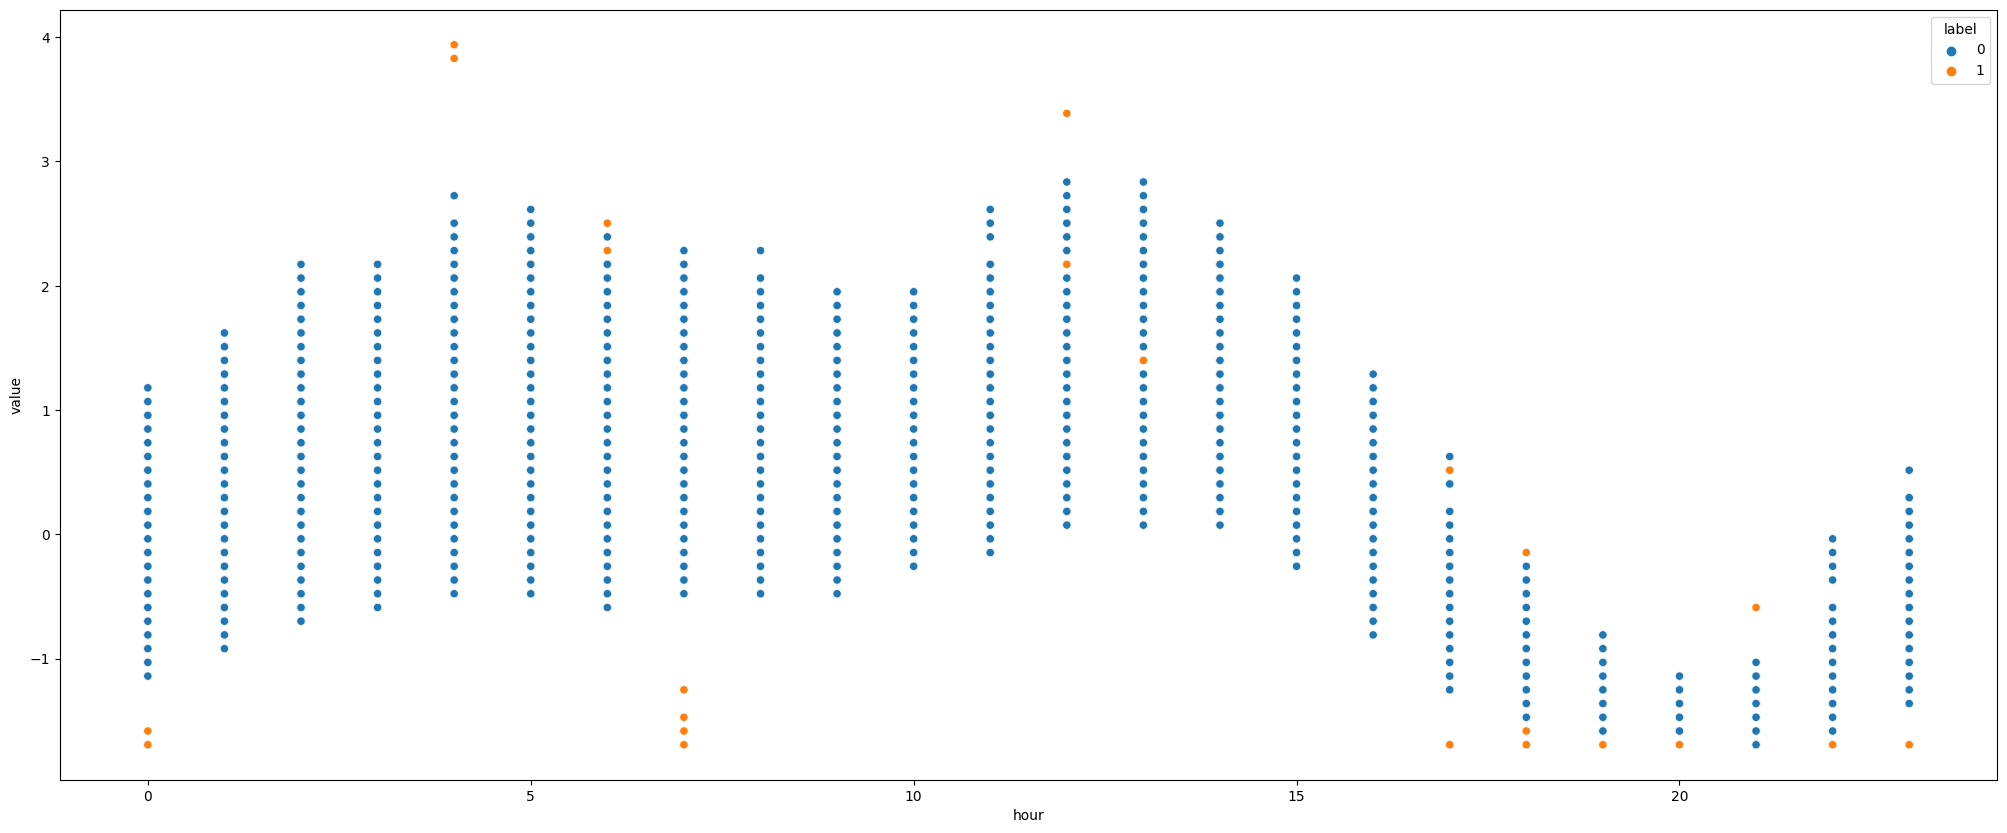

In [ ]:
plt.figure(figsize=(25,10))
ax = sns.scatterplot(data=dfcpu, x="hour", y="value", hue="label")
# ax.tick_params(axis='x', labelrotation = 90)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

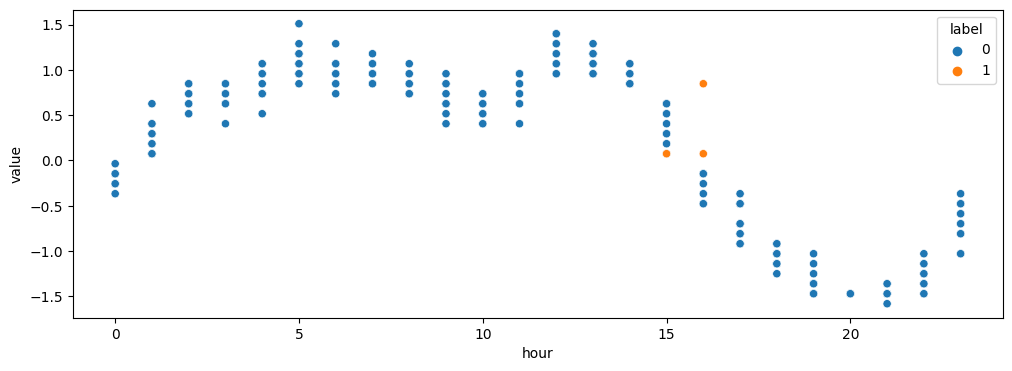

In [ ]:
df1_zoom = dfcpu.loc[dfcpu.date == '2016-08-03']
plt.figure(figsize=(12,4))
sns.scatterplot(data=df1_zoom, x="hour", y="value", hue="label")
plt.show()

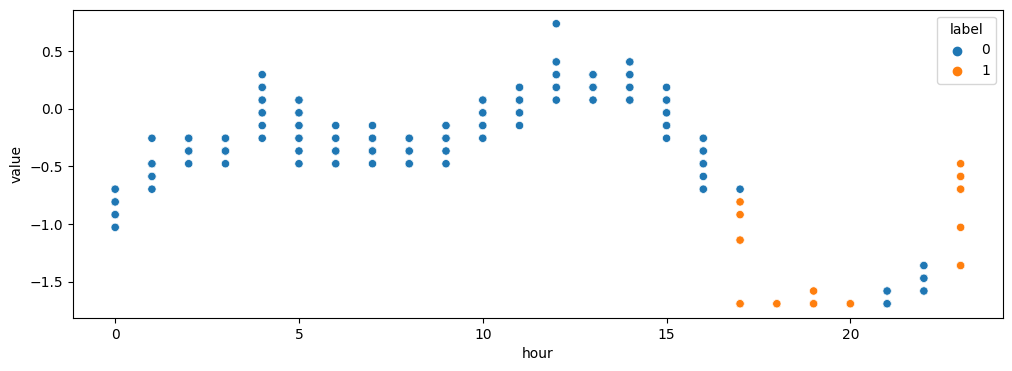

In [ ]:
df1_zoom = dfcpu.loc[dfcpu.date == '2016-08-29']
plt.figure(figsize=(12,4))
sns.scatterplot(data=df1_zoom, x="hour", y="value", hue="label")
plt.show()

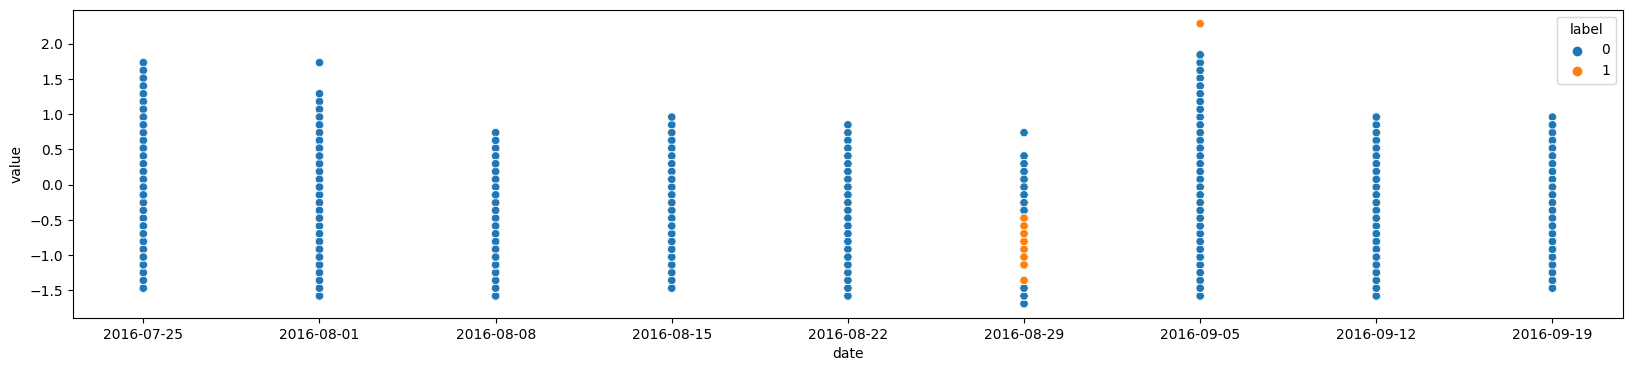

In [ ]:
plt.figure(figsize=(20,4))
dfMon = dfcpu.loc[dfcpu.day == "Monday"].copy()
sns.scatterplot(data=dfMon, x="date", y="value", hue="label")
plt.show()

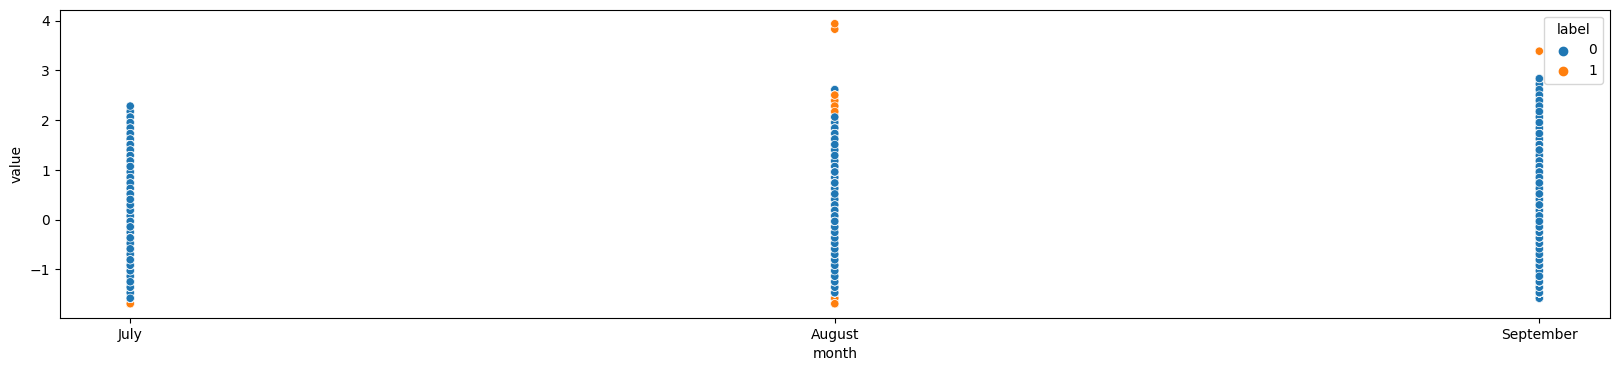

In [ ]:
sns.reset_defaults()
plt.figure(figsize=(20,4))
# dfNormal = dfcpu.loc[dfcpu.label == 0].copy()
sns.scatterplot(data=dfcpu, x="month", y="value", hue="label")
plt.show()

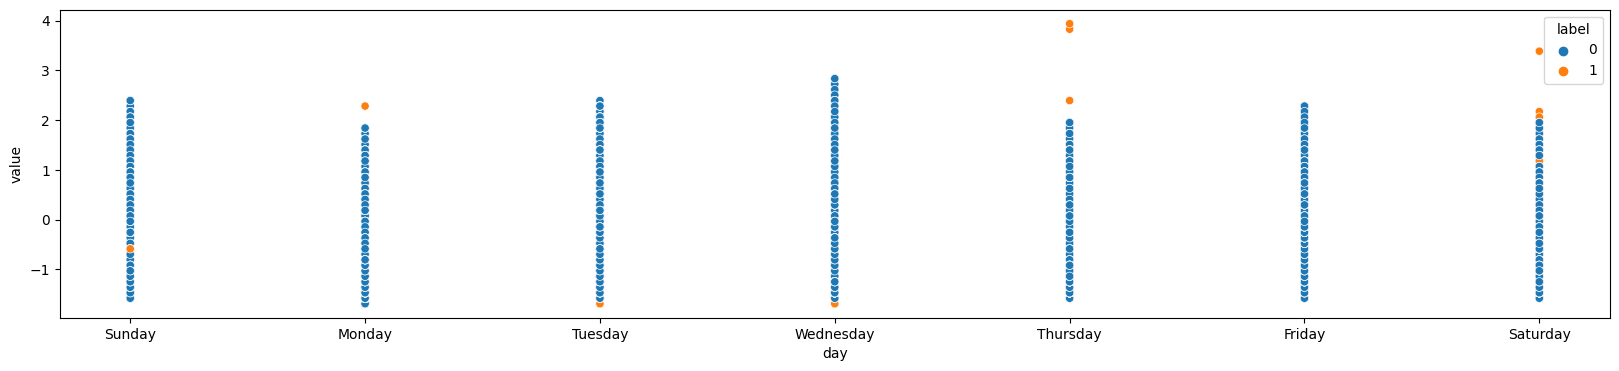

In [ ]:
plt.figure(figsize=(20,4))
# dfAnomaly = dfcpu.loc[dfcpu.label == 1].copy()
sns.scatterplot(data=dfcpu, x="day", y="value", hue="label")
plt.show()

In [ ]:
dfcpuoneday = dfcpu.loc[dfcpu.date == '2016-07-24']

In [ ]:
dfcpuoneday.shape

(96, 41)

In [ ]:
dfcpuoneday.head(12)

,datetime,timestamp,value,label,date,time,month,day,hour,minute,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour.1,hour_sin,hour_cos
0,2016-07-24 16:00:00,1469376000,0.847300,0,2016-07-24,16:00:00,July,Sunday,16,0,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
1,2016-07-24 16:05:00,1469376300,-0.036137,0,2016-07-24,16:05:00,July,Sunday,16,5,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
2,2016-07-24 16:10:00,1469376600,0.074292,0,2016-07-24,16:10:00,July,Sunday,16,10,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
3,2016-07-24 16:15:00,1469376900,0.074292,0,2016-07-24,16:15:00,July,Sunday,16,15,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
4,2016-07-24 16:20:00,1469377200,-0.036137,0,2016-07-24,16:20:00,July,Sunday,16,20,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
5,2016-07-24 16:25:00,1469377500,0.184722,0,2016-07-24,16:25:00,July,Sunday,16,25,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
6,2016-07-24 16:30:00,1469377800,-0.036137,0,2016-07-24,16:30:00,July,Sunday,16,30,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
7,2016-07-24 16:35:00,1469378100,0.184722,0,2016-07-24,16:35:00,July,Sunday,16,35,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
8,2016-07-24 16:40:00,1469378400,0.074292,0,2016-07-24,16:40:00,July,Sunday,16,40,...,0,0,0,0,0,0,0,16,-0.866025,-0.5
9,2016-07-24 16:45:00,1469378700,-0.036137,0,2016-07-24,16:45:00,July,Sunday,16,45,...,0,0,0,0,0,0,0,16,-0.866025,-0.5


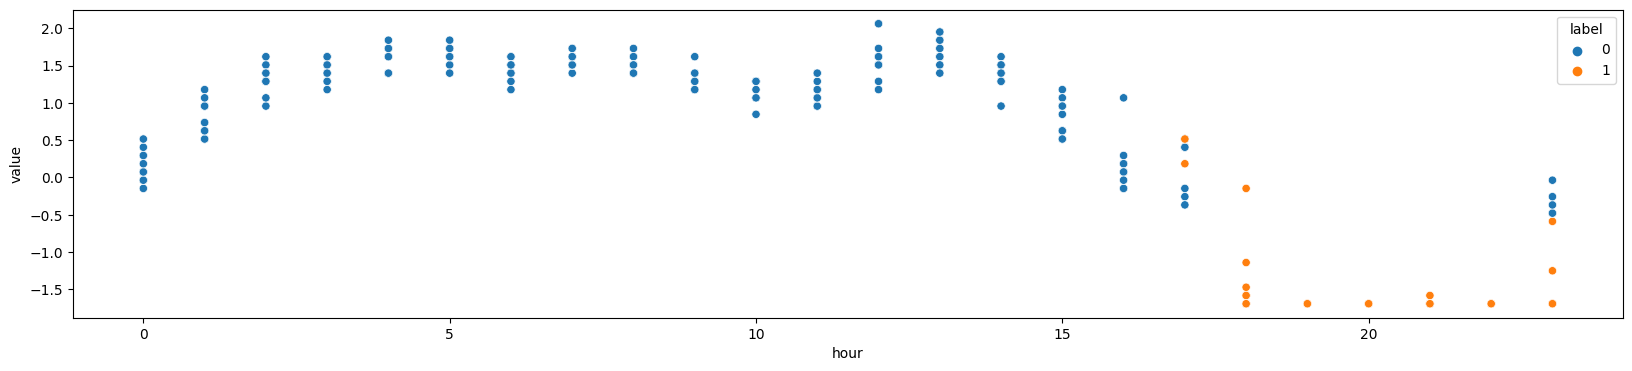

In [ ]:
df27072016 = dfcpu.loc[dfcpu.date == '2016-07-27'].reset_index()
plt.figure(figsize=(20,4))
ax = sns.scatterplot(data=df27072016, x="hour", y="value", hue="label")
# ax.tick_params(axis='x', labelrotation = 90)
plt.show()

In [ ]:
df27072016.shape

(288, 42)

In [ ]:
df27072016.loc[df27072016.label == 1]

,index,datetime,timestamp,value,label,date,time,month,day,hour,...,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour.1,hour_sin,hour_cos
214,886,2016-07-27 17:50:00,1469641800,0.516011,1,2016-07-27,17:50:00,July,Wednesday,17,...,1,0,0,0,0,0,0,17,-0.965926,-2.588190e-01
215,887,2016-07-27 17:55:00,1469642100,0.184722,1,2016-07-27,17:55:00,July,Wednesday,17,...,1,0,0,0,0,0,0,17,-0.965926,-2.588190e-01
216,888,2016-07-27 18:00:00,1469642400,-0.146567,1,2016-07-27,18:00:00,July,Wednesday,18,...,0,1,0,0,0,0,0,18,-1.000000,-1.836970e-16
217,889,2016-07-27 18:05:00,1469642700,-1.140434,1,2016-07-27,18:05:00,July,Wednesday,18,...,0,1,0,0,0,0,0,18,-1.000000,-1.836970e-16
218,890,2016-07-27 18:10:00,1469643000,-1.471723,1,2016-07-27,18:10:00,July,Wednesday,18,...,0,1,0,0,0,0,0,18,-1.000000,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,950,2016-07-27 23:10:00,1469661000,-1.692583,1,2016-07-27,23:10:00,July,Wednesday,23,...,0,0,0,0,0,0,1,23,-0.258819,9.659258e-01
279,951,2016-07-27 23:15:00,1469661300,-1.692583,1,2016-07-27,23:15:00,July,Wednesday,23,...,0,0,0,0,0,0,1,23,-0.258819,9.659258e-01
280,952,2016-07-27 23:20:00,1469661600,-1.692583,1,2016-07-27,23:20:00,July,Wednesday,23,...,0,0,0,0,0,0,1,23,-0.258819,9.659258e-01
281,953,2016-07-27 23:25:00,1469661900,-1.250864,1,2016-07-27,23:25:00,July,Wednesday,23,...,0,0,0,0,0,0,1,23,-0.258819,9.659258e-01


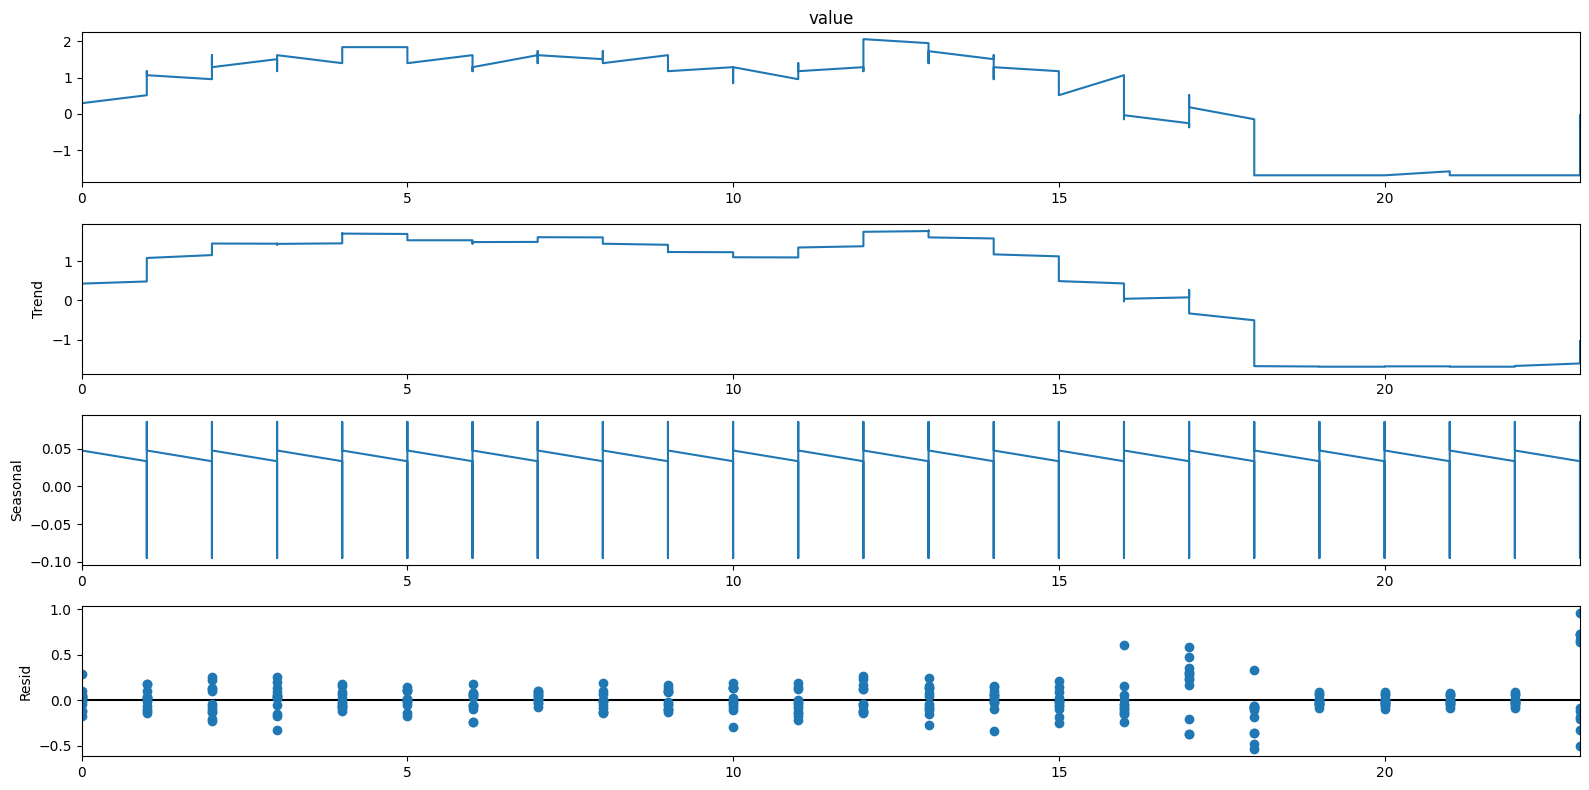

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.dates as mdates
plt.rc('figure',figsize=(16,8))
# plt.figure(figsize=(20,4))
df = df27072016[["hour", "value"]].set_index('hour')
df.sort_index(inplace=True)
result = seasonal_decompose(df['value'],model='additive', extrapolate_trend='freq', period=12)
fig = result.plot()

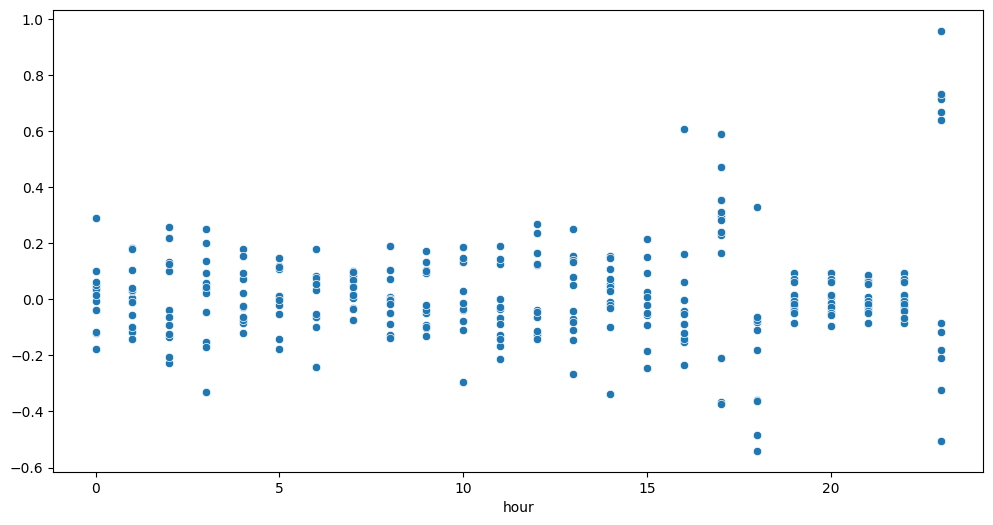

In [ ]:
plt.rc('figure',figsize=(12,6))
# plt.rc('font',size=15)

fig, ax = plt.subplots()
x = result.resid.index
y = result.resid.values

ax = sns.scatterplot(data=result.resid, x=x, y=y)
plt.show()

